In [ ]:
# Importowanie bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as SklearnMLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [42]:
# Wczytanie danych i podział na zbiór treningowy i testowy
data = pd.read_csv('heart.csv')

In [43]:
# Ustalenie ziarna generatora liczb losowych na podstawie indeksów
index_values = data.index.to_numpy()
seed_value = int(index_values.mean())

In [44]:
# Przetwarzanie danych
data['Sex'] = data['Sex'].astype('category')
data['ChestPainType'] = data['ChestPainType'].astype('category')
data = data.drop('RestingECG', axis=1)
data = data[data.RestingBP != 0]
data['ExerciseAngina'] = data['ExerciseAngina'].astype('category')
data['ST_Slope'] = data['ST_Slope'].astype('category')
data = pd.get_dummies(data, drop_first=True)

In [45]:
# Podział danych na cechy (X) i etykiety (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

In [46]:
# Trenowanie modelu MLP
mlp_model = SklearnMLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=seed_value)
mlp_model.fit(X_train, y_train)

MLPClassifier(random_state=458)

Wyniki dla modelu MLP:
Accuracy: 0.8696
Recall: 0.8411
Precision: 0.9278
F1 Score: 0.8824
AUC: 0.9329


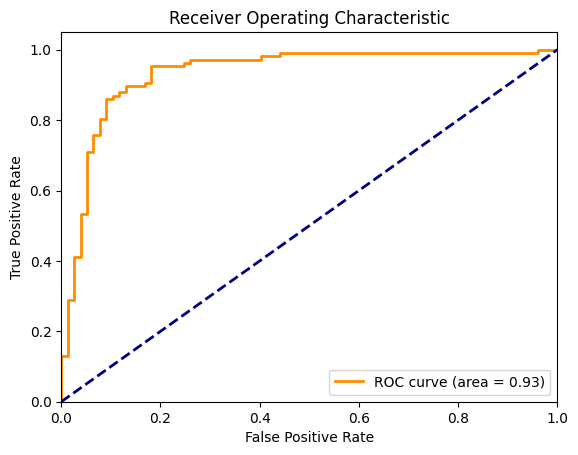

In [47]:
# Ewaluacja modelu MLP
def evaluate_model(model, X_test, y_test):
    # Obliczenie metryk
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc_score = auc(fpr, tpr)

    # Wyświetlenie metryk
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC: {auc_score:.4f}')

    # Wykres krzywej ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
print("Wyniki dla modelu MLP:")
evaluate_model(mlp_model, X_test, y_test)
print("\n")

In [48]:
# Trenowanie modelu Extra Trees

et_model = ExtraTreesClassifier(random_state=seed_value)
et_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=458)

Wyniki dla modelu Extra Trees:
Accuracy: 0.8750
Recall: 0.8972
Precision: 0.8889
F1 Score: 0.8930
AUC: 0.9362


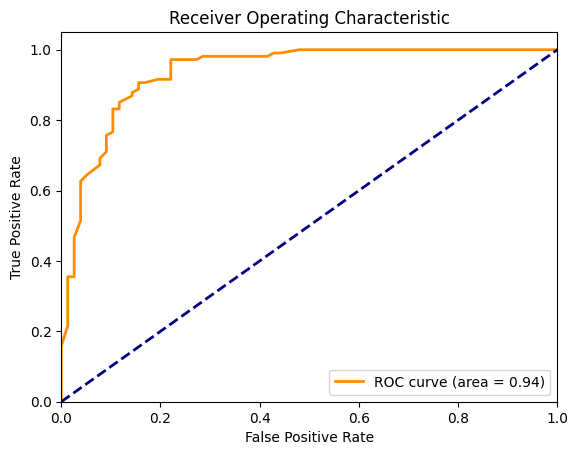

In [49]:
# Ewaluacja modelu Extra Trees

print("Wyniki dla modelu Extra Trees:")
evaluate_model(et_model, X_test, y_test)
print("\n")

In [50]:
# Istotność cech w modelu Extra Trees

importances = et_model.feature_importances_
print("Istotność cech w modelu Extra Trees:")
for name, importance in zip(X.columns, importances):
    print(f"{name}: {importance}")

Istotność cech w modelu Extra Trees:
Age: 0.07898067997558836
RestingBP: 0.07276435341426811
Cholesterol: 0.08978635053798692
FastingBS: 0.03602498156157063
MaxHR: 0.07578187479649831
Oldpeak: 0.08585497807928817
Sex_M: 0.05368236185598038
ChestPainType_ATA: 0.05334038436951607
ChestPainType_NAP: 0.036512993599929634
ChestPainType_TA: 0.014029394979998302
ExerciseAngina_Y: 0.1065885031054889
ST_Slope_Flat: 0.13962640246813865
ST_Slope_Up: 0.15702674125574753
